# Jawaban No. 2

## Persiapan Library

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD, Adam, Adamax

In [8]:
# fungsi ploting loss history
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [9]:
# mengekstrak data dari file zip ke colab
zip_path = '/content/drive/My\ Drive/abc/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

In [10]:
# membagi data train dan validation
dasar_dir = '/content/'
training_dir = os.path.join(dasar_dir, 'train')
validation_dir = os.path.join(dasar_dir, 'test')

In [11]:
# menentukan hyperparameter image augmentation
datagen = ImageDataGenerator(rescale=1./255, 
                            shear_range=0.2, 
                            rotation_range=20, 
                            horizontal_flip=True, 
                            fill_mode='nearest')

In [12]:
# melakukan image augmentation pada data train dan validation
train_iterator = datagen.flow_from_directory(training_dir,
                                             class_mode='binary', 
                                             batch_size=128,
                                             target_size=(200, 200))

val_iterator = datagen.flow_from_directory(validation_dir,
                                           class_mode='binary',
                                           batch_size=128,
                                           target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [20]:
# membuat arsitektur model
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in vgg_conv.layers[:]:
  layer.trainable = False

ft_model = Sequential()

ft_model.add(vgg_conv)
ft_model.add(BatchNormalization(axis=1))
ft_model.add(Dropout(0.25))

ft_model.add(Flatten())
ft_model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
ft_model.add(Dropout(0.5))
ft_model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.0001)

ft_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, mode='max')

cnn_model.summary()

history = ft_model.fit(train_iterator,
                        steps_per_epoch=len(train_iterator),
                        callbacks=[callback],
                        validation_data=val_iterator, 
                        validation_steps=len(val_iterator),
                        epochs=20)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 67712)            

In [23]:
# membuat datframe dari history
df_history = pd.DataFrame(history.history)
df_history['epoch'] = history.epoch
df_history

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.411282,0.819358,0.298368,0.868561,0
1,0.270662,0.883834,0.218851,0.911634,1
2,0.246702,0.895678,0.218900,0.908526,2
3,0.237915,0.896541,0.199471,0.919627,3
4,0.216599,0.909483,0.201977,0.916519,4
5,0.207068,0.913170,0.185970,0.925844,5
6,0.204578,0.913797,0.186398,0.921403,6
7,0.194281,0.918739,0.183070,0.924512,7
8,0.198453,0.916464,0.175783,0.928952,8
9,0.183623,0.921955,0.173910,0.927620,9


In [24]:
# melakukan sort niali val_accuracy terbaik
df_history.sort_values(by='val_accuracy', ascending=False)

,loss,accuracy,val_loss,val_accuracy,epoch
14,0.172445,0.927445,0.166863,0.933837,14
19,0.151315,0.937407,0.165209,0.931172,19
16,0.165937,0.929720,0.167086,0.930284,16
15,0.165733,0.931602,0.179492,0.930284,15
10,0.185250,0.919366,0.179146,0.930284,10
17,0.160708,0.932779,0.174925,0.929840,17
8,0.198453,0.916464,0.175783,0.928952,8
13,0.172340,0.927837,0.183752,0.928064,13
9,0.183623,0.921955,0.173910,0.927620,9
5,0.207068,0.913170,0.185970,0.925844,5


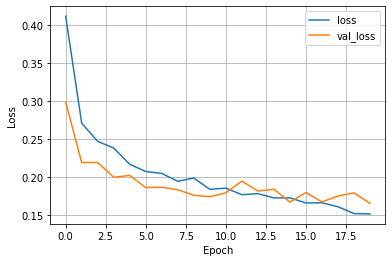

In [25]:
# plotting nilai loss antara data train vs validation
plot_loss(history)

## Kesimpulan:
- Perbedaan Tunning hyperparameter sebelumnya (no.1) yaitu pada image augmentasion (melakukan shear dan rotation) yang dilakukan ke data train dan validation kemudian pada model dilakukan Fine-Tunning dengan CGG16 serta melakukan regularization dengan BatchNormalization dan Dropout, dan optimizer yang digunakan yaitu Adam dengan lr=0.0001 dan epochs=20.
- Hasil prediksi yang dihasilkan lumayan bagus (good fit) dengan val_accuracy terbaik bernilai 0.93 dan train_accuracy = 0.93 sedangkan val_loss = 0.166 dan train_loss = 0.171 pada epoch = 14, yang berarti accuracy dan loss data train vs validation sudah saling setara dengan masing2 accuracy diatas 90% atau menandakan good fit prediction di epoch = 14.